<a href="https://colab.research.google.com/github/Awalilly/DataMining2023/blob/main/Model_selection_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt

path_data = 'MyDrive/Colab Notebooks/data/DataMiningProject/Preprocessed/'
path_mount = '/content/drive/'

In [ ]:
from google.colab import drive
drive.mount(path_mount)

Mounted at /content/drive/


# Paziente S1 - dati unbalanced (88% vs 12%)

## Definizione dei Dataset

In [ ]:
subject = "S1"
file_path = os.path.join(path_mount, path_data, subject)
df = pd.read_json(file_path + "_eeg.json")
df.head()

,epoch,condition,Fz,C3,Cz,C4,Pz,PO7,Oz,PO8
0,0,0,"[0.0008037215, 0.0815292189, 0.1903349691, 0.2...","[-0.0354806138, -0.0402267625, -0.025918934100...","[1.2079755061, 1.1997424097, 1.1384106932, 1.0...","[-0.9933329351, -0.7627846224, -0.457322514900...","[0.27907707860000003, 0.2134605768, 0.07743959...","[-0.9221044471000001, -1.0992268133, -1.254985...","[0.5921590206, 0.5064987129, 0.3957207864, 0.2...","[-0.1290973307, -0.0989927201, -0.0636789098, ..."
1,1,0,"[0.0565051934, -0.1043749771, -0.2030341222, -...","[0.28382840260000003, 0.2751959066, 0.30554853...","[1.6889450958999999, 1.2034051054, 0.883378228...","[0.31041258800000004, 0.4915010637, 0.59487942...","[0.11432276770000001, 0.217928116, 0.283403069...","[-1.2272155366, -1.0431844936, -0.9425910211, ...","[-0.4610306826, -0.3391225015, -0.2695762826, ...","[-0.7657678284, -0.7013482195, -0.6520078263, ..."
2,2,0,"[0.9549364583000001, 0.8849270548, 0.853716113...","[0.5969822345, 0.6780565207, 0.6815831723, 0.5...","[1.790019948, 1.4886599328, 1.1558435656000001...","[0.2877611178, 0.3901774518, 0.4871341823, 0.5...","[-0.7168209143000001, -0.8028761675, -0.848389...","[-2.2965988261, -1.9626064741, -1.567119423399...","[-0.5044859566000001, -0.5009389778000001, -0....","[-0.1117940615, -0.1753993408, -0.2642431052, ..."
3,3,0,"[-0.4681590855, -0.4007133684, -0.289481526000...","[0.6830797544, 0.7110553063, 0.700722273, 0.64...","[-0.6042769627, -0.43161978030000003, -0.32656...","[-1.8472369684, -1.8040627868999999, -1.700912...","[0.43763839920000003, 0.3444413381, 0.21234344...","[2.1946599362, 2.0902168705, 1.978128287200000...","[-0.024563356600000003, -0.1067953604, -0.1762...","[-0.3711417165, -0.4025222189, -0.397964057700..."
4,4,1,"[-0.5178229191, -0.5338781233000001, -0.542303...","[-0.4064988799, -0.4673856038, -0.495266728500...","[0.0759927365, 0.032683769, -0.061223361000000...","[0.5240188341, 0.7349614393, 0.8933296425, 0.9...","[0.5004560176, 0.4167412558, 0.2908421639, 0.1...","[-0.014428586600000001, -0.1247274361, -0.1952...","[-0.09828970370000001, -0.0501661434, 0.019342...","[-0.0634274989, -0.0082291576, 0.0905233106, 0..."


*Costruzione matrice della features*

`X` è la matrice delle *features* di dimensione 1200 x 2808 in cui vengono salvati i dati dopo essere stati standardizzati. In `y` sono inserite le *label* dei dati.

In [ ]:
unicorn_channels = ["Fz", "C3", "Cz", "C4", "Pz", "PO7", "Oz", "PO8"]
pot = df[unicorn_channels].to_numpy()

s = np.zeros(1)
X = np.zeros(2808)

for i in range(pot.shape[0]):
  for j in range(pot.shape[1]):
    temp = np.array(pot[i,j])
    temp = (temp - np.mean(temp)) / np.std(temp)

    s = np.append(s, temp)

  X = np.vstack((X, s[1:]))
  s = np.zeros(1)

y = df.condition.to_numpy()

In [ ]:
X = X[1:,:]
X.shape

(962, 2808)

In [ ]:
y.shape

(962,)

*Suddivisione dei dati tra set di training, set di validazione e set di test*

Il dataset viene suddiviso in:


*   `X_train` e `y_train`: dataset di training;
*   `X_test` e `y_test`: dataset di test contenente il 20% dei dati originali;
*   `X_val` e `y_val`: dataset di test di validazione, che contiene il 20% dei dati di training.


In [ ]:
from sklearn.model_selection import train_test_split
from collections import Counter

# Suddivisione del dataset in set di training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Suddivisione del dataset in set di training e validazione
X_train_original, X_val, y_train_original, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42, stratify = y_train)

In [ ]:
X_train = X_train_original
y_train = y_train_original

Il dataset di training risulta essere fortemente sbilanciato: i dati con label *Non-Target* (NT) sono superiori di quelli *Target* (T).

In [ ]:
class_counter = Counter(y_train)
first_class, count = class_counter.most_common(1)[0]
NT_perc = (count/ len(y_train)) * 100
print("La parecentuale di dati di training NT è ", NT_perc, "% e quella di T è", 100 - NT_perc , "%. E in termini assoluti:", class_counter)

La parecentuale di dati di training NT è  87.64227642276423 % e quella di T è 12.357723577235774 %. E in termini assoluti: Counter({0: 539, 1: 76})


## **Model selection**

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

La fase di *model selection* è strutturata come segue:


1.   Ogni modello è allenato con il dataset di training;
2.   Si stima il `roc_auc` score su *10 Fold Cross Validation*;
3.   Si utilizza `grid_search` per individuare gli iperparametri che consentono di ottimizzare il modello;
4.   Si valutano le prestazioni del *best model* con diversi score e si produce la *Confusion Matrix*.



Gli score utillizati in questa sezione sono:


*   **ROC AUC** (Receiver Operating Characteristic Area Under the Curve): la curva ROC rappresenta la relazione tra il tasso di veri positivi (True Positive Rate, TPR) e il tasso di falsi positivi (False Positive Rate, FPR) al variare della soglia di classificazione. L'area sotto la curva ROC (AUC) fornisce una stima complessiva delle prestazioni del classificatore, dove un valore più vicino a 1 indica una migliore capacità di classificazione.

*   **Accuracy** (Accuratezza): è una misura della percentuale di previsioni corrette rispetto al numero totale di previsioni. È un indicatore generale delle prestazioni del classificatore, calcolato come il rapporto tra il numero di previsioni corrette e il numero totale di campioni.

*   **F1-score**: combina la precisione e il richiamo (recall) del classificatore. È utile quando ci interessa un equilibrio tra precisione e richiamo. L'F1-score è il valore medio armonico di precisione e richiamo ed è calcolato come: 2 * (precision * recall) / (precision + recall). Assume valori compresi tra 0 e 1, dove 1 indica il miglior punteggio possibile.

*   **Precision** (Precisione): la proporzione di istanze positive correttamente identificate rispetto a tutte le istanze identificate come positive dal classificatore. È calcolata come il rapporto tra i veri positivi e la somma dei veri positivi e dei falsi positivi.

*   **Recall** (Richiamo): la proporzione di istanze positive correttamente identificate rispetto al numero totale di istanze positive effettive. È calcolato come il rapporto tra i veri positivi e la somma dei veri positivi e dei falsi negativi.




La *Confusion Matrix* è una matrice 2 x 2, dove le righe rappresentano le etichette di classe reali e le colonne rappresentano le previsioni del modello. Gli scenari possibili sono quattro: True Positive (TP), False Negative (FN), True negative (TN) e False positive (FP).

Ecco un esempio di com'è strutturata una confusion matrix:


```
               | Predetto Positivo | Predetto Negativo |
-------------------------------------------------------
Vero Positivo  |       TP          |       FN          |
-------------------------------------------------------
Vero Negativo  |       FP          |       TN          |
```
Se il modello funziona bene i valori lungo la diagonale saranno più elevati delle altre caselle.


Per poter fare delle considerazioni aggiuntive sulle prestazioni di ogni modello su dati *unbalanced* e *balanced* i valori di ciscuna metrica vengono salvati all'interno della matrice `S1_result`.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB,ComplementNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### **S1 (88% vs 12%) 1. Logistic Regression**

In [ ]:
LR = LogisticRegression(max_iter = 1000)

scores = cross_val_score(LR, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()
print("ROC (cross-validation): ", ROC_mean)

ROC (cross-validation):  0.950635794149945


In [ ]:
np.linspace(0.001, 10, 100)

array([1.000e-03, 1.020e-01, 2.030e-01, 3.040e-01, 4.050e-01, 5.060e-01,
       6.070e-01, 7.080e-01, 8.090e-01, 9.100e-01, 1.011e+00, 1.112e+00,
       1.213e+00, 1.314e+00, 1.415e+00, 1.516e+00, 1.617e+00, 1.718e+00,
       1.819e+00, 1.920e+00, 2.021e+00, 2.122e+00, 2.223e+00, 2.324e+00,
       2.425e+00, 2.526e+00, 2.627e+00, 2.728e+00, 2.829e+00, 2.930e+00,
       3.031e+00, 3.132e+00, 3.233e+00, 3.334e+00, 3.435e+00, 3.536e+00,
       3.637e+00, 3.738e+00, 3.839e+00, 3.940e+00, 4.041e+00, 4.142e+00,
       4.243e+00, 4.344e+00, 4.445e+00, 4.546e+00, 4.647e+00, 4.748e+00,
       4.849e+00, 4.950e+00, 5.051e+00, 5.152e+00, 5.253e+00, 5.354e+00,
       5.455e+00, 5.556e+00, 5.657e+00, 5.758e+00, 5.859e+00, 5.960e+00,
       6.061e+00, 6.162e+00, 6.263e+00, 6.364e+00, 6.465e+00, 6.566e+00,
       6.667e+00, 6.768e+00, 6.869e+00, 6.970e+00, 7.071e+00, 7.172e+00,
       7.273e+00, 7.374e+00, 7.475e+00, 7.576e+00, 7.677e+00, 7.778e+00,
       7.879e+00, 7.980e+00, 8.081e+00, 8.182e+00, 

Migliori parametri: {'C': 0.10200000000000001}
ROC AUC: 0.9150097465886939
Accuracy: 0.9025974025974026
F1-score: 0.5945945945945946
Precision: 0.6111111111111112
Recall: 0.5789473684210527
CPU times: user 2min 32s, sys: 45.1 s, total: 3min 17s
Wall time: 1min 53s


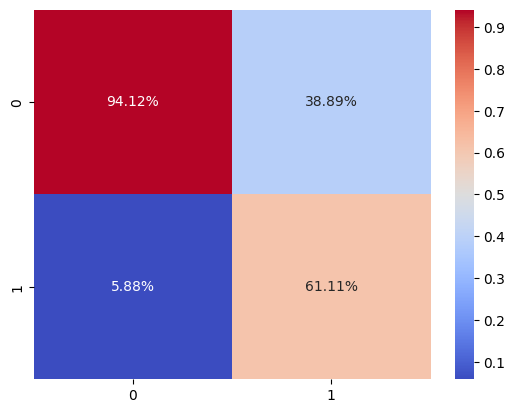

In [ ]:
%%time
parameters = {'C': np.linspace(0.001, 10, 100)}
grid_search = GridSearchCV(LR, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

LR.C = grid_search.best_params_['C']

# Addestro il modello con il miglior parametro
LR.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = LR.predict_proba(X_val)[0:,1]
y_pred = LR.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = LR.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

In [ ]:
S1_result = metrics

### **S1 (88% vs 12%) 2. Random Forest**

In [ ]:
%%time
RF = RandomForestClassifier(n_estimators = 4000, criterion = 'gini')

scores = cross_val_score(RF, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8718453628830988
CPU times: user 14min 28s, sys: 970 ms, total: 14min 29s
Wall time: 14min 33s


In [ ]:
np.linspace(300, 1000, 29).astype(int)

array([ 300,  325,  350,  375,  400,  425,  450,  475,  500,  525,  550,
        575,  600,  625,  650,  675,  700,  725,  750,  775,  800,  825,
        850,  875,  900,  925,  950,  975, 1000])

Migliori parametri: {'n_estimators': 775}
ROC AUC: 0.8910331384015595
Accuracy: 0.8766233766233766
F1-score: 0.0
Precision: 0.0
Recall: 0.0
CPU times: user 1h 8min 46s, sys: 4.98 s, total: 1h 8min 51s
Wall time: 1h 9min 11s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


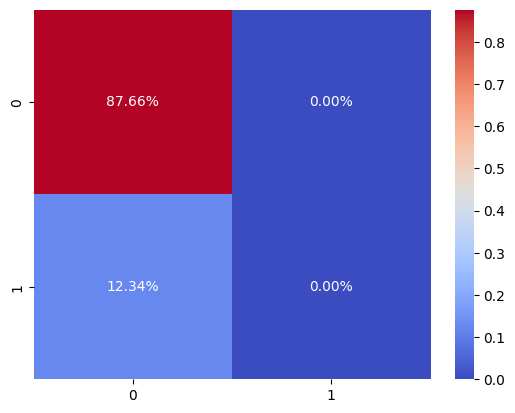

In [ ]:
%%time
parameters = {'n_estimators': np.linspace(300, 1000, 29).astype(int)}

grid_search = GridSearchCV(RF, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

RF.n_estimators = grid_search.best_params_['n_estimators']

# Addestro il modello con il miglior parametro
RF.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = RF.predict_proba(X_val)[0:,1]
y_pred = RF.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = RF.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / (float(np.sum(cf_matrix[:,j])) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S1_result = np.vstack((S1_result, metrics))

### **S1 (88% vs 12%) 3. Naive Bayes**

Il modello Naive Bayes prende come input solo dati positivi, pertanto è necessario traslare i dati come segue.

In [ ]:
s = np.zeros(1)
X_bayes = np.zeros(2808)

for i in range(pot.shape[0]):
  for j in range(pot.shape[1]):
    temp = np.array(pot[i,j])
    temp = (temp - np.mean(temp)) / np.std(temp)
    temp = temp - np.min(temp)

    s = np.append(s, temp)

  X_bayes = np.vstack((X_bayes, s[1:]))
  s = np.zeros(1)


X_bayes = X_bayes[1:,:]
y_bayes = df.condition.to_numpy()

In [ ]:
print(X_bayes.shape, y_bayes.shape)

(962, 2808) (962,)


In [ ]:
# Suddivisione del dataset in set di training e test
X_bayes_train, X_bayes_test, y_bayes_train, y_bayes_test = train_test_split(X_bayes, y_bayes, test_size = 0.2, random_state = 42, stratify = y_bayes)

# Suddivisione del dataset in set di training e validazione
X_bayes_train_original, X_bayes_val, y_bayes_train_original, y_bayes_val = train_test_split(X_bayes_train, y_bayes_train, test_size = 0.2, random_state = 42, stratify = y_bayes_train)

In [ ]:
X_bayes_train = X_bayes_train_original
y_bayes_train = y_bayes_train_original

#### *MultiNB*

In [ ]:
Multi_NB = MultinomialNB()

# Valutazione tramite validazione incrociata (cross-validation)
scores = cross_val_score(Multi_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC score medio (cross-validation):", mean_ROC)

ROC score medio (cross-validation): 0.8603505291005291


Migliori parametri: {'alpha': 0.8314567805772047}
ROC AUC: 0.8502923976608187
Accuracy: 0.8181818181818182
F1-score: 0.44000000000000006
Precision: 0.3548387096774194
Recall: 0.5789473684210527
CPU times: user 46.7 s, sys: 24.2 s, total: 1min 10s
Wall time: 41.3 s


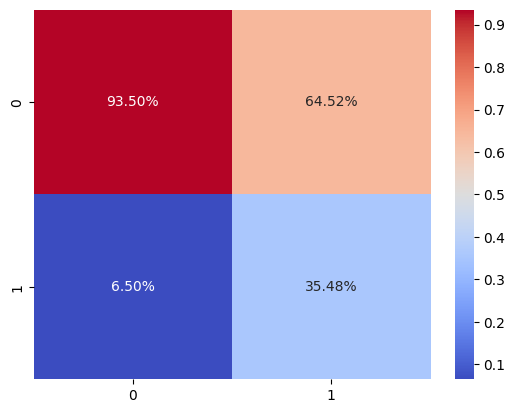

In [ ]:
%%time
# GridSearchCV
parameters = {'alpha': np.logspace(-8, 5, 500)}
grid_search = GridSearchCV(Multi_NB, parameters, cv = cv, scoring = 'roc_auc')

# grid search sul training set
grid_search.fit(X_bayes_train, y_bayes_train)

Multi_NB.alpha =  grid_search.best_params_['alpha']

# Addestro il modello con il miglior parametro
Multi_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Multi_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Multi_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Multi_NB.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')


print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S1_result = np.vstack((S1_result, metrics))

#### *Complement NB*

In [ ]:
Compl_NB = ComplementNB()

# Cross-validation
scores = cross_val_score(Compl_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC Auc (cross-validation):", mean_ROC)

ROC Auc (cross-validation): 0.8603505291005291


Migliori parametri: {'alpha': 0.8314567805772047}
ROC AUC: 0.849512670565302
Accuracy: 0.7987012987012987
F1-score: 0.4363636363636364
Precision: 0.3333333333333333
Recall: 0.631578947368421
CPU times: user 47.2 s, sys: 24.2 s, total: 1min 11s
Wall time: 42 s


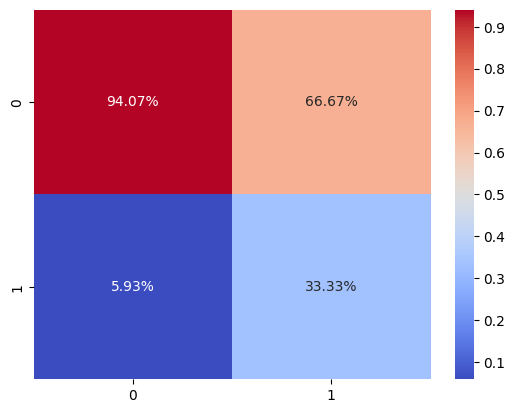

In [ ]:
%%time

parameters = {'alpha': np.logspace(-8, 5, 500)}
grid_search = GridSearchCV(Compl_NB, parameters, cv = cv, scoring = 'roc_auc')

grid_search.fit(X_bayes_train, y_bayes_train)

Compl_NB.alpha = grid_search.best_params_['alpha']

# Addestro il modello con il miglior parametro
Compl_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Compl_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Compl_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Compl_NB.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S1_result = np.vstack((S1_result, metrics))

### **S1 (88% vs 12%) 4. SVM**

#### *Lineare*

In [ ]:
svm_linear = SVC(kernel = 'linear',class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_linear, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.9444850004991515


In [ ]:
np.linspace(1e-4, 0.1, 10)

array([0.0001, 0.0112, 0.0223, 0.0334, 0.0445, 0.0556, 0.0667, 0.0778,
       0.0889, 0.1   ])

Migliori parametri: {'C': 0.10110909090909091}
ROC AUC: 0.8978557504873295
Accuracy: 0.8896103896103896
F1-score: 0.5853658536585366
Precision: 0.5454545454545454
Recall: 0.631578947368421
CPU times: user 6min 2s, sys: 375 ms, total: 6min 2s
Wall time: 6min 2s


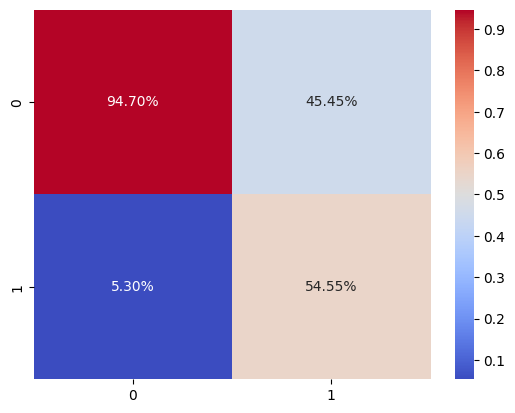

In [ ]:
%%time
parameters = {'C': np.linspace(1e-4, 10, 100)}

grid_search = GridSearchCV(svm_linear, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_linear.C = grid_search.best_params_['C']

# Addestro il modello con il miglior parametro
svm_linear.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_linear.predict_proba(X_val)[0:,1]
y_pred = svm_linear.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_linear.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S1_result = np.vstack((S1_result, metrics))

#### *Polinomiale*

In [ ]:
%%time
svm_poli = SVC(kernel = 'poly', probability = True)

scores = cross_val_score(svm_poli, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8789376809423979
CPU times: user 8.83 s, sys: 8.04 ms, total: 8.84 s
Wall time: 8.84 s


In [ ]:
np.linspace(0.01, 5, 20)

array([0.01      , 0.27263158, 0.53526316, 0.79789474, 1.06052632,
       1.32315789, 1.58578947, 1.84842105, 2.11105263, 2.37368421,
       2.63631579, 2.89894737, 3.16157895, 3.42421053, 3.68684211,
       3.94947368, 4.21210526, 4.47473684, 4.73736842, 5.        ])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Migliori parametri: {'C': 0.01, 'degree': 3}
ROC AUC: 0.8241715399610137
Accuracy: 0.8766233766233766
F1-score: 0.0
Precision: 0.0
Recall: 0.0
CPU times: user 8min 52s, sys: 566 ms, total: 8min 53s
Wall time: 8min 53s


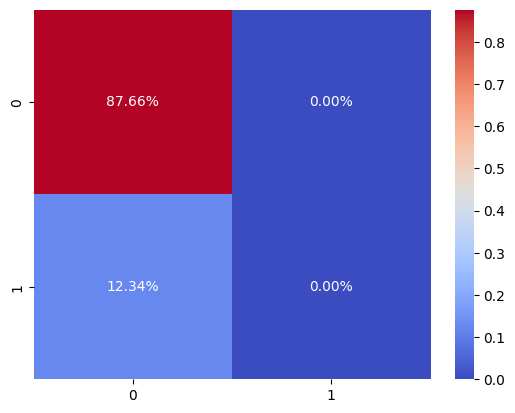

In [ ]:
%%time
parameters = {'degree': [2, 3, 4], 'C': np.linspace(0.01, 5, 20)}

grid_search = GridSearchCV(svm_poli, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_poli.C = grid_search.best_params_['C']
svm_poli.degree = grid_search.best_params_['degree']

# Addestro il modello con il miglior parametro
svm_poli.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_poli.predict_proba(X_val)[0:,1]
y_pred = svm_poli.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_poli.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j])+ 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S1_result = np.vstack((S1_result, metrics))

#### *Radial Basis Function (RBF)*

In [ ]:
%%time
svm_rbf = SVC(kernel = "rbf", class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_rbf, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.9444656583807527
CPU times: user 10.1 s, sys: 6.87 ms, total: 10.1 s
Wall time: 10.2 s


Migliori parametri: {'C': 1.9473684210526314}
ROC AUC: 0.9021442495126706
Accuracy: 0.8766233766233766
F1-score: 0.09523809523809525
Precision: 0.5
Recall: 0.05263157894736842
CPU times: user 3min 19s, sys: 182 ms, total: 3min 20s
Wall time: 3min 20s


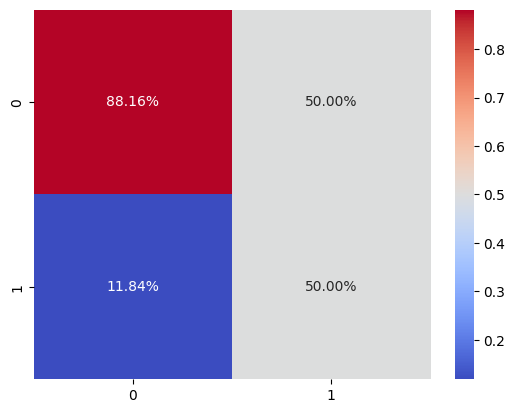

In [ ]:
%%time
parameters = {'C': np.linspace(1, 10, 20)}

grid_search = GridSearchCV(svm_rbf, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_rbf.C = grid_search.best_params_['C']

# Addestro il modello con il miglior parametro
svm_rbf.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_rbf.predict_proba(X_val)[0:,1]
y_pred = svm_rbf.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_rbf.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S1_result = np.vstack((S1_result, metrics))

### **S1 (88% vs 12%) 5. LDA**

In [ ]:
%%time
lda = LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage = 'auto')

scores = cross_val_score(lda, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.915430642907058
CPU times: user 1min 37s, sys: 10.5 s, total: 1min 47s
Wall time: 1min 4s


In [ ]:
np.linspace(1e-8, 1, 5)

array([1.00000000e-08, 2.50000008e-01, 5.00000005e-01, 7.50000002e-01,
       1.00000000e+00])

Migliori parametri: {'shrinkage': 0.7777777800000001}
ROC AUC: 0.9450292397660819
Accuracy: 0.922077922077922
F1-score: 0.7
Precision: 0.6666666666666666
Recall: 0.7368421052631579
CPU times: user 14min 34s, sys: 1min 24s, total: 15min 59s
Wall time: 9min 17s


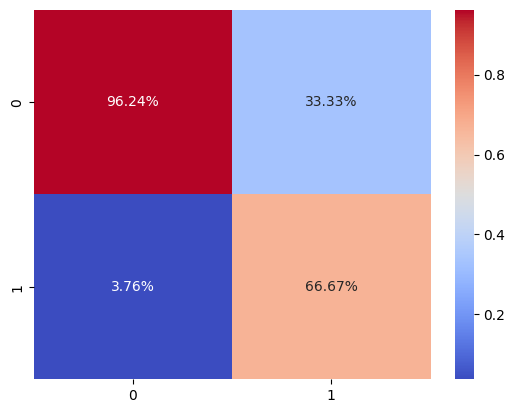

In [ ]:
%%time
parameters = {'shrinkage' : np.linspace(1e-8, 1, 10)}

grid_search = GridSearchCV(lda, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

lda.shrinkage = grid_search.best_params_['shrinkage']

# Addestro il modello con il miglior parametro
lda.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = lda.predict_proba(X_val)[0:,1]
y_pred = lda.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = lda.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S1_result = np.vstack((S1_result, metrics))

# Paziente S1 - dati unbalanced (70% vs 30%)

## Definizione dei Dataset

Suddivisione dei dati tra set di training, set di validazione e set di test e bilanciamento dei dati

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy = 30/70, random_state = 42)
X_train, y_train = undersampler.fit_resample(X_train_original, y_train_original)

class_counter = Counter(y_train)
first_class, count = class_counter.most_common(1)[0]
NT_perc = (count/ len(y_train)) * 100
print("La parecentuale di dati di training NT è ", NT_perc, "% e quella di T è", 100 - NT_perc , "%. E in termini assoluti:", class_counter)

La parecentuale di dati di training NT è  69.96047430830039 % e quella di T è 30.03952569169961 %. E in termini assoluti: Counter({0: 177, 1: 76})


## **Model selection**

### **S1 (70% vs 30%) 1. Logistic Regression**

In [ ]:
LR = LogisticRegression(max_iter = 1000)

scores = cross_val_score(LR, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC (cross-validation): ", ROC_mean)

ROC (cross-validation):  0.9295985060690943


Cerco i migliori parameti con Grid search

Migliori parametri: {'C': 1.819}
ROC AUC: 0.8803118908382066
Accuracy: 0.8376623376623377
F1-score: 0.5098039215686275
Precision: 0.40625
Recall: 0.6842105263157895
CPU times: user 1min 9s, sys: 29.7 s, total: 1min 39s
Wall time: 56.8 s


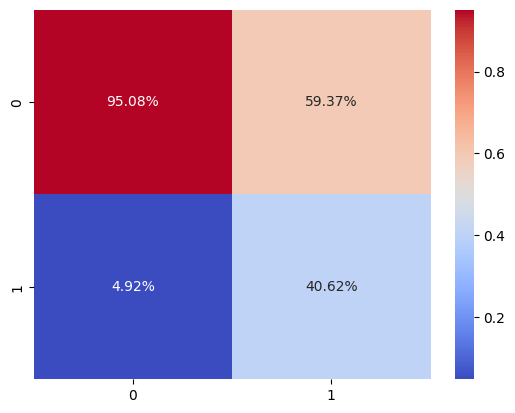

In [ ]:
%%time
parameters = {'C': np.linspace(0.001, 10, 100)}
grid_search = GridSearchCV(LR, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

LR.C = grid_search.best_params_['C']
LR.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = LR.predict_proba(X_val)[0:,1]
y_pred = LR.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = LR.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)
S1_result = np.vstack((S1_result, metrics))

### **S1 (70% vs 30%) 2. Random Forest**

In [ ]:
%%time
RF = RandomForestClassifier(criterion = 'gini')

scores = cross_val_score(RF, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8735760971055088
CPU times: user 5.31 s, sys: 7.59 ms, total: 5.32 s
Wall time: 5.37 s


Migliori parametri: {'n_estimators': 850}
ROC AUC: 0.9313840155945419
Accuracy: 0.8961038961038961
F1-score: 0.3333333333333333
Precision: 0.8
Recall: 0.21052631578947367
CPU times: user 15min 50s, sys: 1.97 s, total: 15min 52s
Wall time: 15min 56s


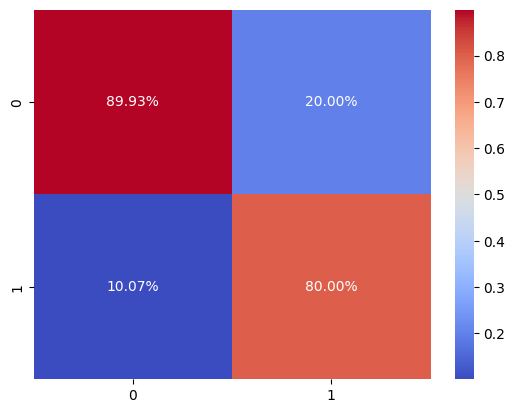

In [ ]:
%%time
parameters = {'n_estimators': np.linspace(300, 1000, 29).astype(int)}

grid_search = GridSearchCV(RF, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

RF.n_estimators = grid_search.best_params_['n_estimators']
RF.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = RF.predict_proba(X_val)[0:,1]
y_pred = RF.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = RF.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S1_result = np.vstack((S1_result, metrics))

### **S1 (70% vs 30%) 3. Naive Bayes**

Traslazione dei dati per rendere positivi i valori per il Naive Bayes

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy = 30/70, random_state = 42)
X_bayes_train, y_bayes_train = undersampler.fit_resample(X_bayes_train_original, y_bayes_train_original)

class_counter = Counter(y_bayes_train)
first_class, count = class_counter.most_common(1)[0]
NT_perc = (count/ len(y_bayes_train)) * 100
print("La parecentuale di dati di training NT è ", NT_perc, "% e quella di T è", 100 - NT_perc , "%. E in termini assoluti:", class_counter)

La parecentuale di dati di training NT è  69.96047430830039 % e quella di T è 30.03952569169961 %. E in termini assoluti: Counter({0: 177, 1: 76})


#### *MultiNB*

In [ ]:
%%time
Multi_NB = MultinomialNB()

# Valutazione tramite validazione incrociata (cross-validation)
scores = cross_val_score(Multi_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC score medio (cross-validation):", mean_ROC)

ROC score medio (cross-validation): 0.8537640056022407
CPU times: user 53.2 ms, sys: 27.9 ms, total: 81.1 ms
Wall time: 49.9 ms


Migliori parametri: {'alpha': 0.5463550352214875}
ROC AUC: 0.802729044834308
Accuracy: 0.7142857142857143
F1-score: 0.3888888888888889
Precision: 0.2641509433962264
Recall: 0.7368421052631579
CPU times: user 27.4 s, sys: 15.9 s, total: 43.3 s
Wall time: 26.3 s


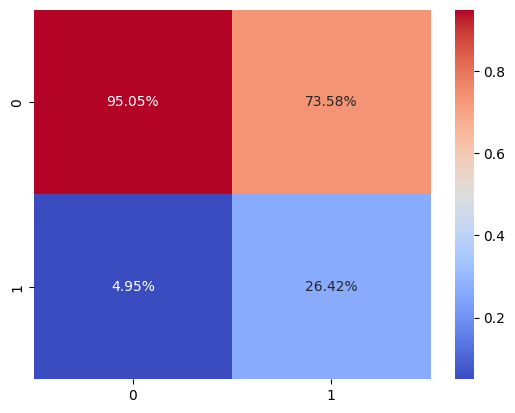

In [ ]:
%%time
Multi_NB = MultinomialNB()

# GridSearchCV
parameters = {'alpha': np.logspace(-8, 5, 500)}
grid_search = GridSearchCV(Multi_NB, parameters, cv = cv, scoring = 'roc_auc')

# grid search sul training set
grid_search.fit(X_bayes_train, y_bayes_train)

best_alpha_M = grid_search.best_params_['alpha']

# Addestro il modello con il miglior parametro
Multi_NB = MultinomialNB(alpha = best_alpha_M)
Multi_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Multi_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Multi_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Multi_NB.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')


print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S1_result = np.vstack((S1_result, metrics))

#### *Complement NB*

In [ ]:
%%time
Compl_NB = ComplementNB()

# Cross-validation
scores = cross_val_score(Compl_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC Auc (cross-validation):", mean_ROC)

ROC Auc (cross-validation): 0.8537844304388422
CPU times: user 58.8 ms, sys: 44.9 ms, total: 104 ms
Wall time: 64 ms


Migliori parametri: {'alpha': 0.5463550352214875}
ROC AUC: 0.804288499025341
Accuracy: 0.7012987012987013
F1-score: 0.37837837837837834
Precision: 0.2545454545454545
Recall: 0.7368421052631579
CPU times: user 27.3 s, sys: 16.1 s, total: 43.4 s
Wall time: 25 s


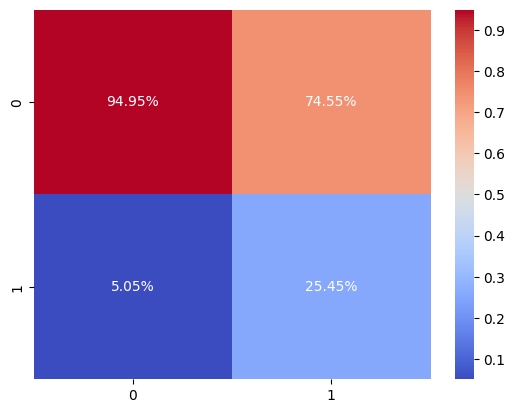

In [ ]:
%%time

parameters = {'alpha': np.logspace(-8, 5, 500)}
grid_search = GridSearchCV(Compl_NB, parameters, cv = cv, scoring = 'roc_auc')

grid_search.fit(X_bayes_train, y_bayes_train)

Compl_NB.alpha = grid_search.best_params_['alpha']
Compl_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Compl_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Compl_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Compl_NB.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')


print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S1_result = np.vstack((S1_result, metrics))

### **S1 (70% vs 30%) 4. SVM**

#### *Lineare*

In [ ]:
svm_linear = SVC(kernel = 'linear',class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_linear, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.9249941643323997


Migliori parametri: {'C': 0.10110909090909091}
ROC AUC: 0.8814814814814814
Accuracy: 0.8246753246753247
F1-score: 0.49056603773584906
Precision: 0.38235294117647056
Recall: 0.6842105263157895
CPU times: user 2min 11s, sys: 214 ms, total: 2min 11s
Wall time: 2min 11s


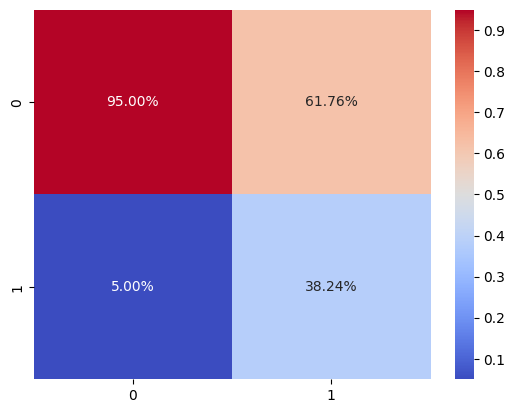

In [ ]:
%%time
parameters = {'C': np.linspace(1e-4, 10, 100)}

grid_search = GridSearchCV(svm_linear, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_linear.C = grid_search.best_params_['C']

# Addestro il modello con il miglior parametro
svm_linear.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_linear.predict_proba(X_val)[0:,1]
y_pred = svm_linear.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_linear.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S1_result = np.vstack((S1_result, metrics))

#### *Polinomiale*

In [ ]:
svm_poli = SVC(kernel = 'poly', probability = True)

scores = cross_val_score(svm_poli, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8387721755368813


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Migliori parametri: {'C': 0.01, 'degree': 3}
ROC AUC: 0.7844054580896686
Accuracy: 0.8766233766233766
F1-score: 0.0
Precision: 0.0
Recall: 0.0
CPU times: user 1min 32s, sys: 190 ms, total: 1min 33s
Wall time: 1min 33s


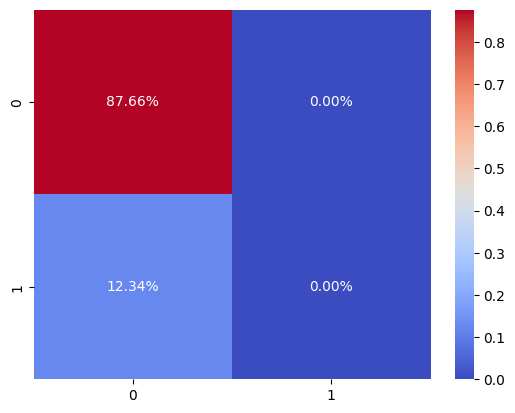

In [ ]:
%%time
parameters = {'degree': [2, 3, 4], 'C': np.linspace(0.01, 5, 20)}

grid_search = GridSearchCV(svm_poli, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_poli.C = grid_search.best_params_['C']
svm_poli.degree = grid_search.best_params_['degree']

# Addestro il modello con il miglior parametro
svm_poli.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_poli.predict_proba(X_val)[0:,1]
y_pred = svm_poli.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_poli.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S1_result = np.vstack((S1_result, metrics))

#### *Radial Basis Function (RBF)*

In [ ]:
svm_rbf = SVC(kernel = "rbf", class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_rbf, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8996440242763774


Migliori parametri: {'C': 1.9473684210526314}
ROC AUC: 0.8643274853801169
Accuracy: 0.8766233766233766
F1-score: 0.45714285714285713
Precision: 0.5
Recall: 0.42105263157894735
CPU times: user 39.1 s, sys: 49.7 ms, total: 39.2 s
Wall time: 39.2 s


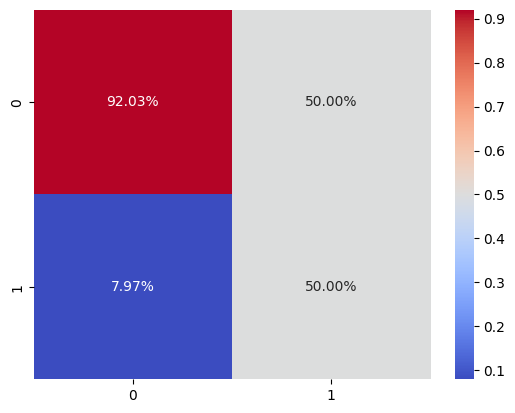

In [ ]:
%%time
parameters = {'C': np.linspace(1, 10, 20)}

grid_search = GridSearchCV(svm_rbf, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_rbf.C = grid_search.best_params_['C']

# Addestro il modello con il miglior parametro
svm_rbf.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_rbf.predict_proba(X_val)[0:,1]
y_pred = svm_rbf.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_rbf.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S1_result = np.vstack((S1_result, metrics))

### **S1 (70% vs 30%) 5. LDA**

In [ ]:
%%time
lda = LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage = 'auto')

scores = cross_val_score(lda, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.878577264239029
CPU times: user 1min 31s, sys: 9.36 s, total: 1min 40s
Wall time: 59 s


In [ ]:
np.linspace(0.5, 1, 5)

array([0.5  , 0.625, 0.75 , 0.875, 1.   ])

Migliori parametri: {'shrinkage': 0.88888889}
ROC AUC: 0.892007797270955
Accuracy: 0.8311688311688312
F1-score: 0.5
Precision: 0.3939393939393939
Recall: 0.6842105263157895
CPU times: user 14min 11s, sys: 1min 22s, total: 15min 33s
Wall time: 9min 1s


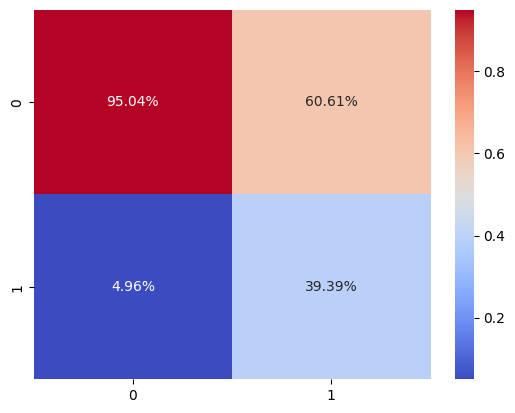

In [ ]:
%%time
parameters = {'shrinkage' : np.linspace(1e-8, 1, 10)}

grid_search = GridSearchCV(lda, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

lda.shrinkage = grid_search.best_params_['shrinkage']

# Addestro il modello con il miglior parametro
lda.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = lda.predict_proba(X_val)[0:,1]
y_pred = lda.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = lda.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S1_result = np.vstack((S1_result, metrics))

In [ ]:
S1_result.shape

(16, 5)

# Paziente S1 - dati unbalanced (60% vs 40%)

## Definizione dei Dataset

Suddivisione dei dati tra set di training, set di validazione e set di test e bilanciamento dei dati

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy = 40/60, random_state=42)
X_train, y_train = undersampler.fit_resample(X_train_original, y_train_original)

class_counter = Counter(y_train)
first_class, count = class_counter.most_common(1)[0]
NT_perc = (count/ len(y_train)) * 100
print("La parecentuale di dati di training NT è ", NT_perc, "% e quella di T è", 100 - NT_perc , "%. E in termini assoluti:", class_counter)

La parecentuale di dati di training NT è  60.0 % e quella di T è 40.0 %. E in termini assoluti: Counter({0: 114, 1: 76})


## **Model selection**

### **S1 (60% vs 40%) 1. Logistic Regression**

In [ ]:
%%time
LR = LogisticRegression(max_iter = 1000)

scores = cross_val_score(LR, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC (cross-validation): ", ROC_mean)

ROC (cross-validation):  0.898809523809524
CPU times: user 551 ms, sys: 245 ms, total: 796 ms
Wall time: 422 ms


Cerco i migliori parameti con Grid search

Migliori parametri: {'C': 0.6070000000000001}
ROC AUC: 0.8604288499025341
Accuracy: 0.8181818181818182
F1-score: 0.5333333333333333
Precision: 0.3902439024390244
Recall: 0.8421052631578947
CPU times: user 51.4 s, sys: 25.1 s, total: 1min 16s
Wall time: 43.5 s


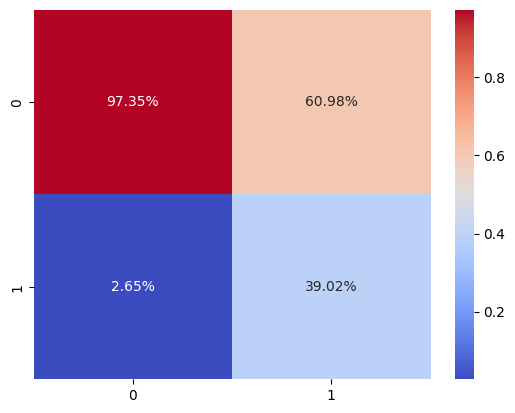

In [ ]:
%%time
parameters = {'C': np.linspace(0.001, 10, 100)}
grid_search = GridSearchCV(LR, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

LR.C = grid_search.best_params_['C']

# Addestro il modello con il miglior parametro
LR.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = LR.predict_proba(X_val)[0:,1]
y_pred = LR.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = LR.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)
S1_result = np.vstack((S1_result, metrics))

### **S1 (60% vs 40%) 2. Random Forest**

In [ ]:
%%time
RF = RandomForestClassifier(criterion = 'gini')

scores = cross_val_score(RF, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8732683982683984
CPU times: user 3.93 s, sys: 7.55 ms, total: 3.94 s
Wall time: 3.99 s


Migliori parametri: {'n_estimators': 1000}
ROC AUC: 0.9138401559454191
Accuracy: 0.9025974025974026
F1-score: 0.5945945945945946
Precision: 0.6111111111111112
Recall: 0.5789473684210527
CPU times: user 10min 53s, sys: 1.83 s, total: 10min 55s
Wall time: 10min 58s


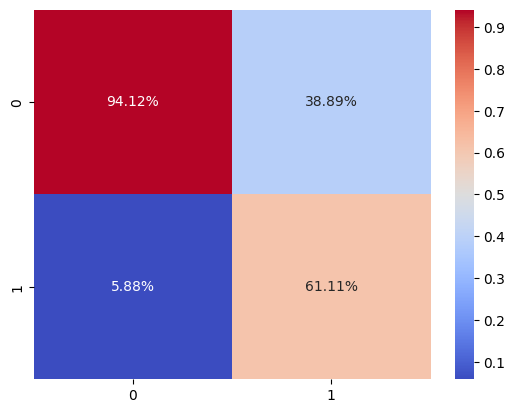

In [ ]:
%%time
parameters = {'n_estimators': np.linspace(300, 1000, 29).astype(int)}

grid_search = GridSearchCV(RF, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

RF.n_estimators = grid_search.best_params_['n_estimators']
RF.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = RF.predict_proba(X_val)[0:,1]
y_pred = RF.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = RF.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S1_result = np.vstack((S1_result, metrics))

### **S1 (60% vs 40%) 3. Naive Bayes**

Traslazione dei dati per rendere positivi i valori per il Naive Bayes

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy = 40/60, random_state = 42)
X_bayes_train, y_bayes_train = undersampler.fit_resample(X_bayes_train_original, y_bayes_train_original)

class_counter = Counter(y_bayes_train)
first_class, count = class_counter.most_common(1)[0]
NT_perc = (count/ len(y_bayes_train)) * 100
print("La parecentuale di dati di training NT è ", NT_perc, "% e quella di T è", 100 - NT_perc , "%. E in termini assoluti:", class_counter)

La parecentuale di dati di training NT è  60.0 % e quella di T è 40.0 %. E in termini assoluti: Counter({0: 114, 1: 76})


#### *MultiNB*

In [ ]:
%%time
Multi_NB = MultinomialNB()

# Valutazione tramite validazione incrociata (cross-validation)
scores = cross_val_score(Multi_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC score medio (cross-validation):", mean_ROC)

ROC score medio (cross-validation): 0.8287337662337663
CPU times: user 54.5 ms, sys: 21.9 ms, total: 76.4 ms
Wall time: 49.5 ms


Migliori parametri: {'alpha': 10.328281259410275}
ROC AUC: 0.8202729044834307
Accuracy: 0.6948051948051948
F1-score: 0.4050632911392405
Precision: 0.26666666666666666
Recall: 0.8421052631578947
CPU times: user 23.8 s, sys: 14.3 s, total: 38.1 s
Wall time: 22.3 s


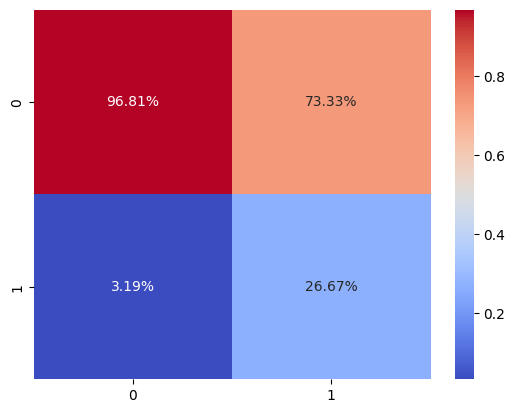

In [ ]:
%%time

# GridSearchCV
parameters = {'alpha': np.logspace(-8, 5, 500)}
grid_search = GridSearchCV(Multi_NB, parameters, cv = cv, scoring = 'roc_auc')

# grid search sul training set
grid_search.fit(X_bayes_train, y_bayes_train)

Multi_NB.alpha = grid_search.best_params_['alpha']

# Addestro il modello con il miglior parametro
Multi_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Multi_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Multi_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Multi_NB.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')


print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S1_result = np.vstack((S1_result, metrics))

#### *Complement NB*

In [ ]:
%%time
Compl_NB = ComplementNB()

# Cross-validation
scores = cross_val_score(Compl_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC Auc (cross-validation):", mean_ROC)

ROC Auc (cross-validation): 0.8293019480519479
CPU times: user 59.8 ms, sys: 38.9 ms, total: 98.7 ms
Wall time: 65.5 ms


Migliori parametri: {'alpha': 10.328281259410275}
ROC AUC: 0.8202729044834307
Accuracy: 0.6883116883116883
F1-score: 0.4
Precision: 0.26229508196721313
Recall: 0.8421052631578947
CPU times: user 24 s, sys: 14.5 s, total: 38.5 s
Wall time: 22.5 s


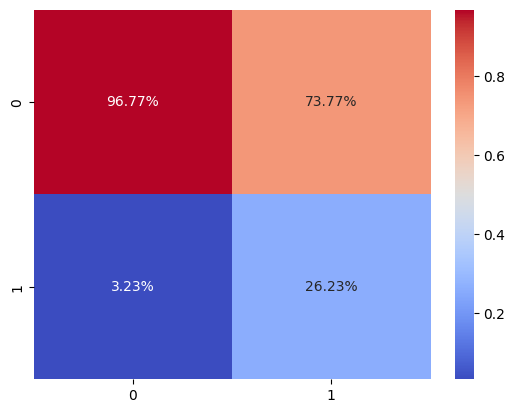

In [ ]:
%%time

parameters = {'alpha': np.logspace(-8, 5, 500)}
grid_search = GridSearchCV(Compl_NB, parameters, cv = cv, scoring = 'roc_auc')

grid_search.fit(X_bayes_train, y_bayes_train)

Compl_NB.alpha = grid_search.best_params_['alpha']

# Addestro il modello con il miglior parametro
Compl_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Compl_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Compl_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Compl_NB.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')


print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S1_result = np.vstack((S1_result, metrics))

### **S1 (60% vs 40%) 4. SVM**

#### *Lineare*

In [ ]:
svm_linear = SVC(kernel = 'linear',class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_linear, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8906385281385282


In [ ]:
np.linspace(0.001, 0.02, 4)

array([0.001     , 0.00733333, 0.01366667, 0.02      ])

Migliori parametri: {'C': 0.10110909090909091}
ROC AUC: 0.8514619883040936
Accuracy: 0.7987012987012987
F1-score: 0.4918032786885246
Precision: 0.35714285714285715
Recall: 0.7894736842105263
CPU times: user 1min 21s, sys: 119 ms, total: 1min 21s
Wall time: 1min 21s


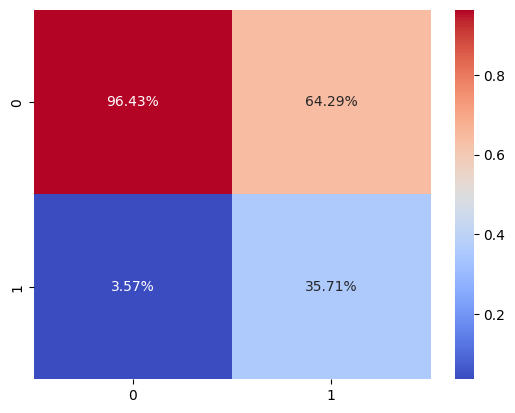

In [ ]:
%%time
parameters = {'C': np.linspace(1e-4, 10, 100)}

grid_search = GridSearchCV(svm_linear, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_linear.C = grid_search.best_params_['C']
svm_linear.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_linear.predict_proba(X_val)[0:,1]
y_pred = svm_linear.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_linear.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S1_result = np.vstack((S1_result, metrics))

#### *Polinomiale*

In [ ]:
svm_poli = SVC(kernel = 'poly', probability = True)

scores = cross_val_score(svm_poli, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8125


Migliori parametri: {'C': 1.3231578947368423, 'degree': 3}
ROC AUC: 0.7805068226120858
Accuracy: 0.8766233766233766
F1-score: 0.0
Precision: 0.0
Recall: 0.0
CPU times: user 53.7 s, sys: 83 ms, total: 53.8 s
Wall time: 54 s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


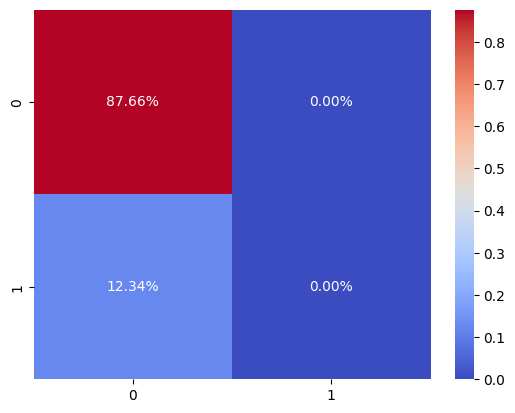

In [ ]:
%%time
parameters = {'degree': [2, 3, 4], 'C': np.linspace(0.01, 5, 20)}

grid_search = GridSearchCV(svm_poli, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_poli.C = grid_search.best_params_['C']
svm_poli.degree = grid_search.best_params_['degree']
svm_poli.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_poli.predict_proba(X_val)[0:,1]
y_pred = svm_poli.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_poli.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S1_result = np.vstack((S1_result, metrics))

#### *Radial Basis Function (RBF)*

In [ ]:

svm_rbf = SVC(kernel = "rbf", class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_rbf, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8859848484848485


Migliori parametri: {'C': 1.4736842105263157}
ROC AUC: 0.8510721247563353
Accuracy: 0.8636363636363636
F1-score: 0.5333333333333333
Precision: 0.46153846153846156
Recall: 0.631578947368421
CPU times: user 22.8 s, sys: 68.5 ms, total: 22.9 s
Wall time: 22.9 s


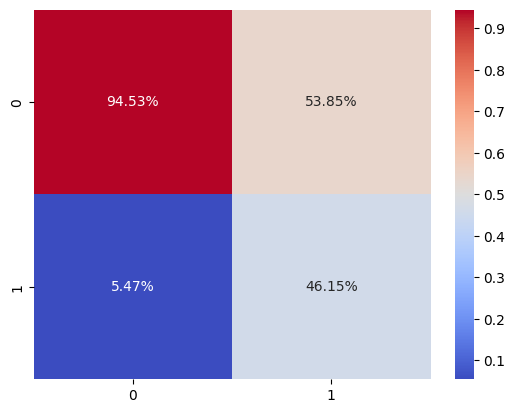

In [ ]:
%%time
parameters = {'C': np.linspace(1, 10, 20)}

grid_search = GridSearchCV(svm_rbf, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_rbf.C = grid_search.best_params_['C']

# Addestro il modello con il miglior parametro
svm_rbf.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_rbf.predict_proba(X_val)[0:,1]
y_pred = svm_rbf.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_rbf.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S1_result = np.vstack((S1_result, metrics))

### **S1 (60% vs 40%) 5. LDA**

In [ ]:
lda = LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage = 'auto')

scores = cross_val_score(lda, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8886363636363637


In [ ]:
np.linspace(0.5, 1, 5)

array([0.5  , 0.625, 0.75 , 0.875, 1.   ])

Migliori parametri: {'shrinkage': 0.88888889}
ROC AUC: 0.86588693957115
Accuracy: 0.7857142857142857
F1-score: 0.49230769230769234
Precision: 0.34782608695652173
Recall: 0.8421052631578947
CPU times: user 14min 19s, sys: 1min 23s, total: 15min 42s
Wall time: 9min 6s


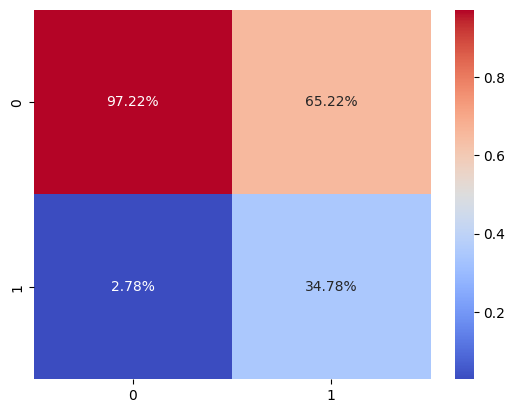

In [ ]:
%%time
parameters = {'shrinkage' : np.linspace(1e-8, 1, 10)}

grid_search = GridSearchCV(lda, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

lda.shrinkage = grid_search.best_params_['shrinkage']

# Addestro il modello con il miglior parametro
lda.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = lda.predict_proba(X_val)[0:,1]
y_pred = lda.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = lda.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S1_result = np.vstack((S1_result, metrics))

In [ ]:
S1_result.shape

(24, 5)

# Paziente S1 - dati unbalanced (50% vs 50%)

## Definizione dei Dataset

Suddivisione dei dati tra set di training, set di validazione e set di test e bilanciamento dei dati

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy = 1, random_state = 42)
X_train, y_train = undersampler.fit_resample(X_train_original, y_train_original)

class_counter = Counter(y_train)
first_class, count = class_counter.most_common(1)[0]
NT_perc = (count/ len(y_train)) * 100
print("La parecentuale di dati di training NT è ", NT_perc, "% e quella di T è", 100 - NT_perc , "%. E in termini assoluti:", class_counter)

La parecentuale di dati di training NT è  50.0 % e quella di T è 50.0 %. E in termini assoluti: Counter({0: 76, 1: 76})


## **Model selection**

### **S1 (50% vs 50%) 1. Logistic Regression**

In [ ]:
%%time

LR = LogisticRegression(max_iter = 1000)

scores = cross_val_score(LR, X_train, y_train, cv = cv, scoring = 'f1')
ROC_mean = scores.mean()

print("ROC (cross-validation): ", ROC_mean)

ROC (cross-validation):  0.8235689619977545
CPU times: user 473 ms, sys: 421 ms, total: 894 ms
Wall time: 763 ms


Cerco i migliori parameti con Grid search

Migliori parametri: {'C': 0.001}
ROC AUC: 0.8534113060428851
Accuracy: 0.7272727272727273
F1-score: 0.46153846153846156
Precision: 0.3050847457627119
Recall: 0.9473684210526315
CPU times: user 41.3 s, sys: 21.3 s, total: 1min 2s
Wall time: 35.2 s


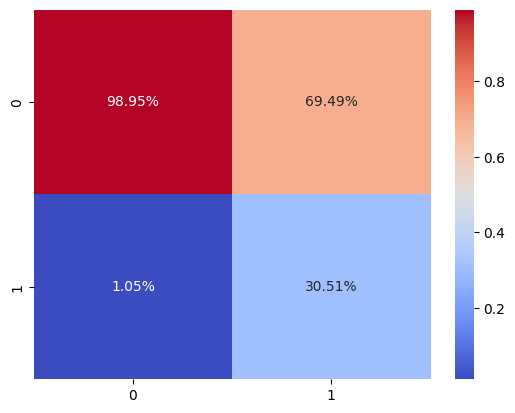

In [ ]:
%%time
parameters = {'C': np.linspace(0.001, 10, 100)}
grid_search = GridSearchCV(LR, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

LR.C = grid_search.best_params_['C']
LR.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = LR.predict_proba(X_val)[0:,1]
y_pred = LR.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = LR.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)
S1_result = np.vstack((S1_result, metrics))

### **S1 (50% vs 50%) 2. Random Forest**

In [ ]:
%%time
RF = RandomForestClassifier(criterion = 'gini')

scores = cross_val_score(RF, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8841517857142858
CPU times: user 3 s, sys: 7.88 ms, total: 3.01 s
Wall time: 3.02 s


Migliori parametri: {'n_estimators': 325}
ROC AUC: 0.8816764132553606
Accuracy: 0.8051948051948052
F1-score: 0.4999999999999999
Precision: 0.36585365853658536
Recall: 0.7894736842105263
CPU times: user 8min 41s, sys: 1.67 s, total: 8min 42s
Wall time: 8min 45s


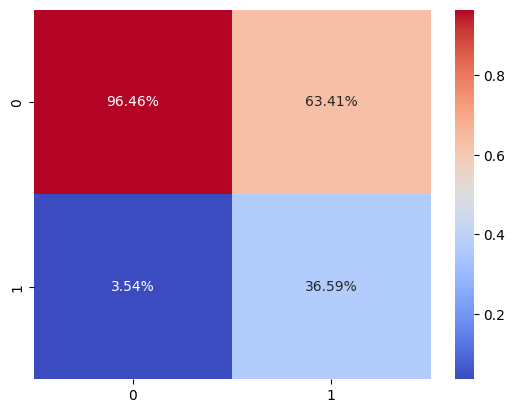

In [ ]:
%%time
parameters = {'n_estimators': np.linspace(300, 1000, 29).astype(int)}

grid_search = GridSearchCV(RF, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

RF.n_estimators = grid_search.best_params_['n_estimators']
RF.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = RF.predict_proba(X_val)[0:,1]
y_pred = RF.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = RF.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S1_result = np.vstack((S1_result, metrics))

### **S1 (50% vs 50%) 3. Naive Bayes**

Traslazione dei dati per rendere positivi i valori per il Naive Bayes

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy = 1, random_state = 42)
X_bayes_train, y_bayes_train = undersampler.fit_resample(X_bayes_train_original, y_bayes_train_original)

class_counter = Counter(y_bayes_train)
first_class, count = class_counter.most_common(1)[0]
NT_perc = (count/ len(y_bayes_train)) * 100
print("La parecentuale di dati di training NT è ", NT_perc, "% e quella di T è", 100 - NT_perc , "%. E in termini assoluti:", class_counter)

La parecentuale di dati di training NT è  50.0 % e quella di T è 50.0 %. E in termini assoluti: Counter({0: 76, 1: 76})


#### *MultiNB*

In [ ]:
Multi_NB = MultinomialNB()

# Valutazione tramite validazione incrociata (cross-validation)
scores = cross_val_score(Multi_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC score medio (cross-validation):", mean_ROC)

ROC score medio (cross-validation): 0.8622767857142858


Migliori parametri: {'alpha': 21.21550171362448}
ROC AUC: 0.8167641325536062
Accuracy: 0.6753246753246753
F1-score: 0.41860465116279066
Precision: 0.26865671641791045
Recall: 0.9473684210526315
CPU times: user 21.7 s, sys: 13.4 s, total: 35 s
Wall time: 19.3 s


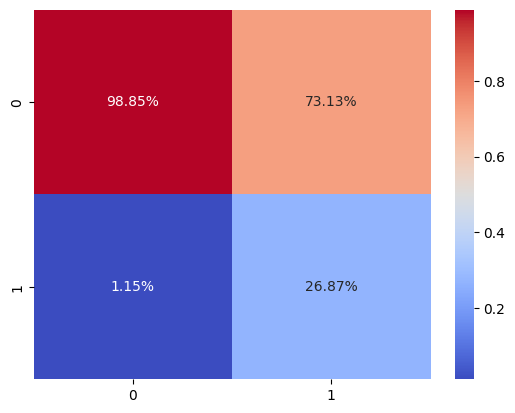

In [ ]:
%%time

# GridSearchCV
parameters = {'alpha': np.logspace(-8, 5, 500)}
grid_search = GridSearchCV(Multi_NB, parameters, cv = cv, scoring = 'roc_auc')

# grid search sul training set
grid_search.fit(X_bayes_train, y_bayes_train)

Multi_NB.alpha = grid_search.best_params_['alpha']
Multi_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Multi_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Multi_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Multi_NB.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')


print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S1_result = np.vstack((S1_result, metrics))

#### *Complement NB*

In [ ]:
%%time
Compl_NB = ComplementNB()

# Cross-validation
scores = cross_val_score(Compl_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC Auc (cross-validation):", mean_ROC)

ROC Auc (cross-validation): 0.8622767857142858
CPU times: user 46.4 ms, sys: 23 ms, total: 69.4 ms
Wall time: 38.1 ms


Migliori parametri: {'alpha': 21.21550171362448}
ROC AUC: 0.8167641325536062
Accuracy: 0.6753246753246753
F1-score: 0.41860465116279066
Precision: 0.26865671641791045
Recall: 0.9473684210526315
CPU times: user 22.7 s, sys: 13.9 s, total: 36.7 s
Wall time: 22.9 s


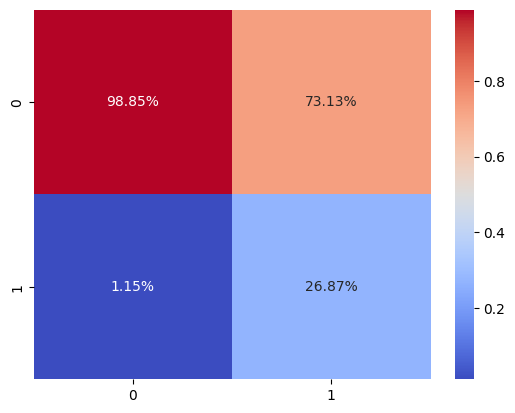

In [ ]:
%%time
parameters = {'alpha': np.logspace(-8, 5, 500)}
grid_search = GridSearchCV(Compl_NB, parameters, cv = cv, scoring = 'roc_auc')

grid_search.fit(X_bayes_train, y_bayes_train)

Compl_NB.alpha = grid_search.best_params_['alpha']
Compl_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Compl_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Compl_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Compl_NB.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')


print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S1_result = np.vstack((S1_result, metrics))

### **S1 (50% vs 50%) 4. SVM**

#### *Lineare*

In [ ]:
svm_linear = SVC(kernel = 'linear',class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_linear, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8756696428571429


Migliori parametri: {'C': 0.10110909090909091}
ROC AUC: 0.8319688109161792
Accuracy: 0.7207792207792207
F1-score: 0.410958904109589
Precision: 0.2777777777777778
Recall: 0.7894736842105263
CPU times: user 55.1 s, sys: 80.6 ms, total: 55.2 s
Wall time: 55.3 s


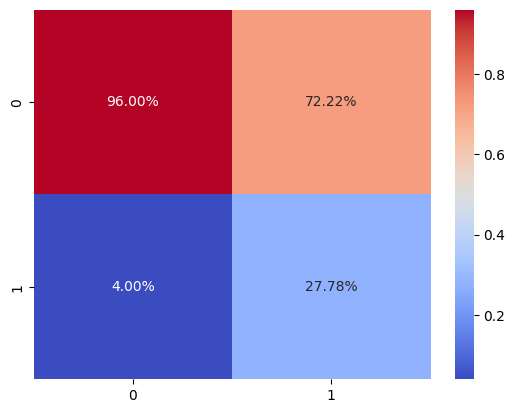

In [ ]:
%%time
parameters = {'C': np.linspace(1e-4, 10, 100)}

grid_search = GridSearchCV(svm_linear, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_linear.C = grid_search.best_params_['C']
svm_linear.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_linear.predict_proba(X_val)[0:,1]
y_pred = svm_linear.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_linear.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S1_result = np.vstack((S1_result, metrics))

#### *Polinomiale*

In [ ]:
svm_poli = SVC(kernel = 'poly', probability = True)

scores = cross_val_score(svm_poli, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8611607142857143


Migliori parametri: {'C': 1.0605263157894738, 'degree': 3}
ROC AUC: 0.7590643274853801
Accuracy: 0.7012987012987013
F1-score: 0.32352941176470584
Precision: 0.22448979591836735
Recall: 0.5789473684210527
CPU times: user 34.6 s, sys: 94.4 ms, total: 34.7 s
Wall time: 34.7 s


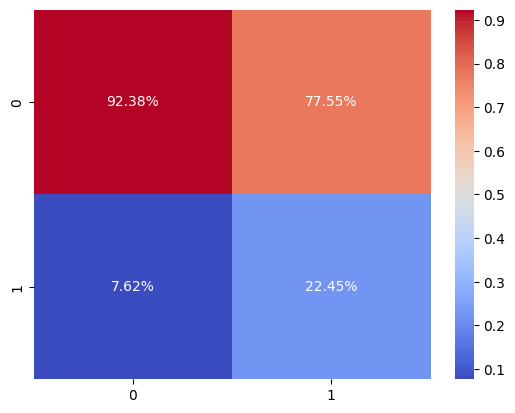

In [ ]:
%%time
parameters = {'degree': [2, 3, 4], 'C': np.linspace(0.01, 5, 20)}

grid_search = GridSearchCV(svm_poli, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_poli.C = grid_search.best_params_['C']
svm_poli.degree = grid_search.best_params_['degree']
svm_poli.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_poli.predict_proba(X_val)[0:,1]
y_pred = svm_poli.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_poli.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S1_result = np.vstack((S1_result, metrics))

#### *Radial Basis Function (RBF)*

In [ ]:
svm_rbf = SVC(kernel = "rbf", class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_rbf, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8888392857142857


Migliori parametri: {'C': 1.9473684210526314}
ROC AUC: 0.839766081871345
Accuracy: 0.7207792207792207
F1-score: 0.4556962025316456
Precision: 0.3
Recall: 0.9473684210526315
CPU times: user 14.8 s, sys: 49.3 ms, total: 14.9 s
Wall time: 14.9 s


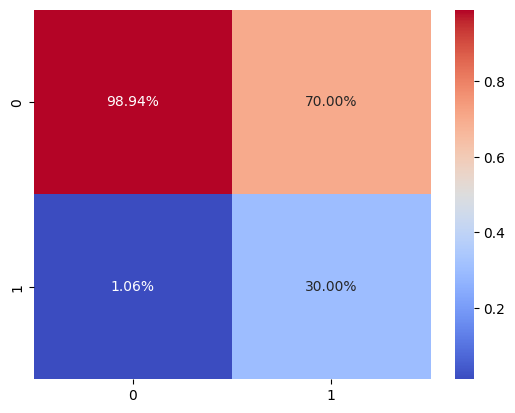

In [ ]:
%%time
parameters = {'C': np.linspace(1, 10, 20)}

grid_search = GridSearchCV(svm_rbf, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_rbf.C = grid_search.best_params_['C']
svm_rbf.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_rbf.predict_proba(X_val)[0:,1]
y_pred = svm_rbf.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_rbf.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S1_result = np.vstack((S1_result, metrics))

### **S1 (50% vs 50%) 5. LDA**

In [ ]:
lda = LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage = 'auto')

scores = cross_val_score(lda, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8801339285714287


In [ ]:
np.linspace(0.4, 1, 5)

array([0.4 , 0.55, 0.7 , 0.85, 1.  ])

Migliori parametri: {'shrinkage': 0.88888889}
ROC AUC: 0.8432748538011695
Accuracy: 0.7207792207792207
F1-score: 0.44155844155844154
Precision: 0.29310344827586204
Recall: 0.8947368421052632
CPU times: user 14min 15s, sys: 1min 20s, total: 15min 36s
Wall time: 9min 2s


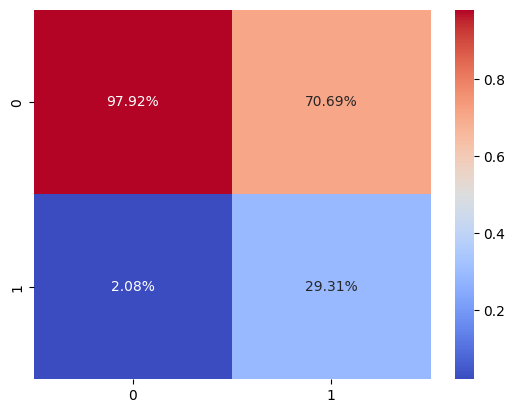

In [ ]:
%%time
parameters = {'shrinkage' : np.linspace(1e-8, 1, 10)}

grid_search = GridSearchCV(lda, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

lda.shrinkage = grid_search.best_params_['shrinkage']
lda.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = lda.predict_proba(X_val)[0:,1]
y_pred = lda.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = lda.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S1_result = np.vstack((S1_result, metrics))

In [ ]:
S1_result.shape

(32, 5)

# Salvataggio risultati per il paziente

In [ ]:
path_data = '/content/drive/MyDrive/Colab Notebooks/data/DataMiningProject/Results'
file_path = os.path.join(path_mount, path_data, subject)
np.save(file_path + "_results", S1_result)
print(file_path)

/content/drive/MyDrive/Colab Notebooks/data/DataMiningProject/Results/S1
